From "Best of 22Aug_Texas_Heated_RF_SVR_LR.ipynb"


"Saeed Bidi, May2023"

In [3]:
#CELL 2
# Importing the libraries
import numpy as np # for array operations
from numpy import mean
from numpy import std
from numpy import absolute

import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
import matplotlib.pylab as pylab

# from google.colab import files
# %matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn import metrics
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from xgboost import XGBRegressor

In [4]:
#CELL 3
#df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Temperature_Texas/Temperature_Data.csv")
#df.shape
# dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Temperature_Texas/Temperature_Data.csv")
dataset = pd.read_csv('Temperature_Data.csv')
#dataset = dataset[dataset['DNI (W/m2)'] >= 1]
X = dataset.iloc[:, 2:-2].values
y = dataset.iloc[:, -2].values
#y = y.reshape(len(y),1)

In [5]:
#CELL 5
#Feature Scaling
sc_X = StandardScaler()
#sc_y = StandardScaler()
X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

In [6]:
#CELL 6
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.25, random_state = 42)

In [7]:
#CELL 7
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#X, y = make_regression(n_samples=200, n_features=1, n_informative=5, random_state=1)
#regressor = XGBRegressor()
regressor = RandomForestRegressor()
#regressor = LinearRegression()
#regressor = SVR(kernel = 'linear')
#regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(xtrain, ytrain)

RandomForestRegressor()

In [8]:
#CELL 8
ypred = regressor.predict(xtest)

score = regressor.score(xtrain, ytrain)

scores = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
mean(absolute(scores)), std(scores)

MAE = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))
print("MAE: ", MAE)
print("R-squared:", score)

MSE:  0.47549138943047226
RMSE:  0.689558836815592
MAE:  0.3336563763519217
R-squared: 0.997632322201199


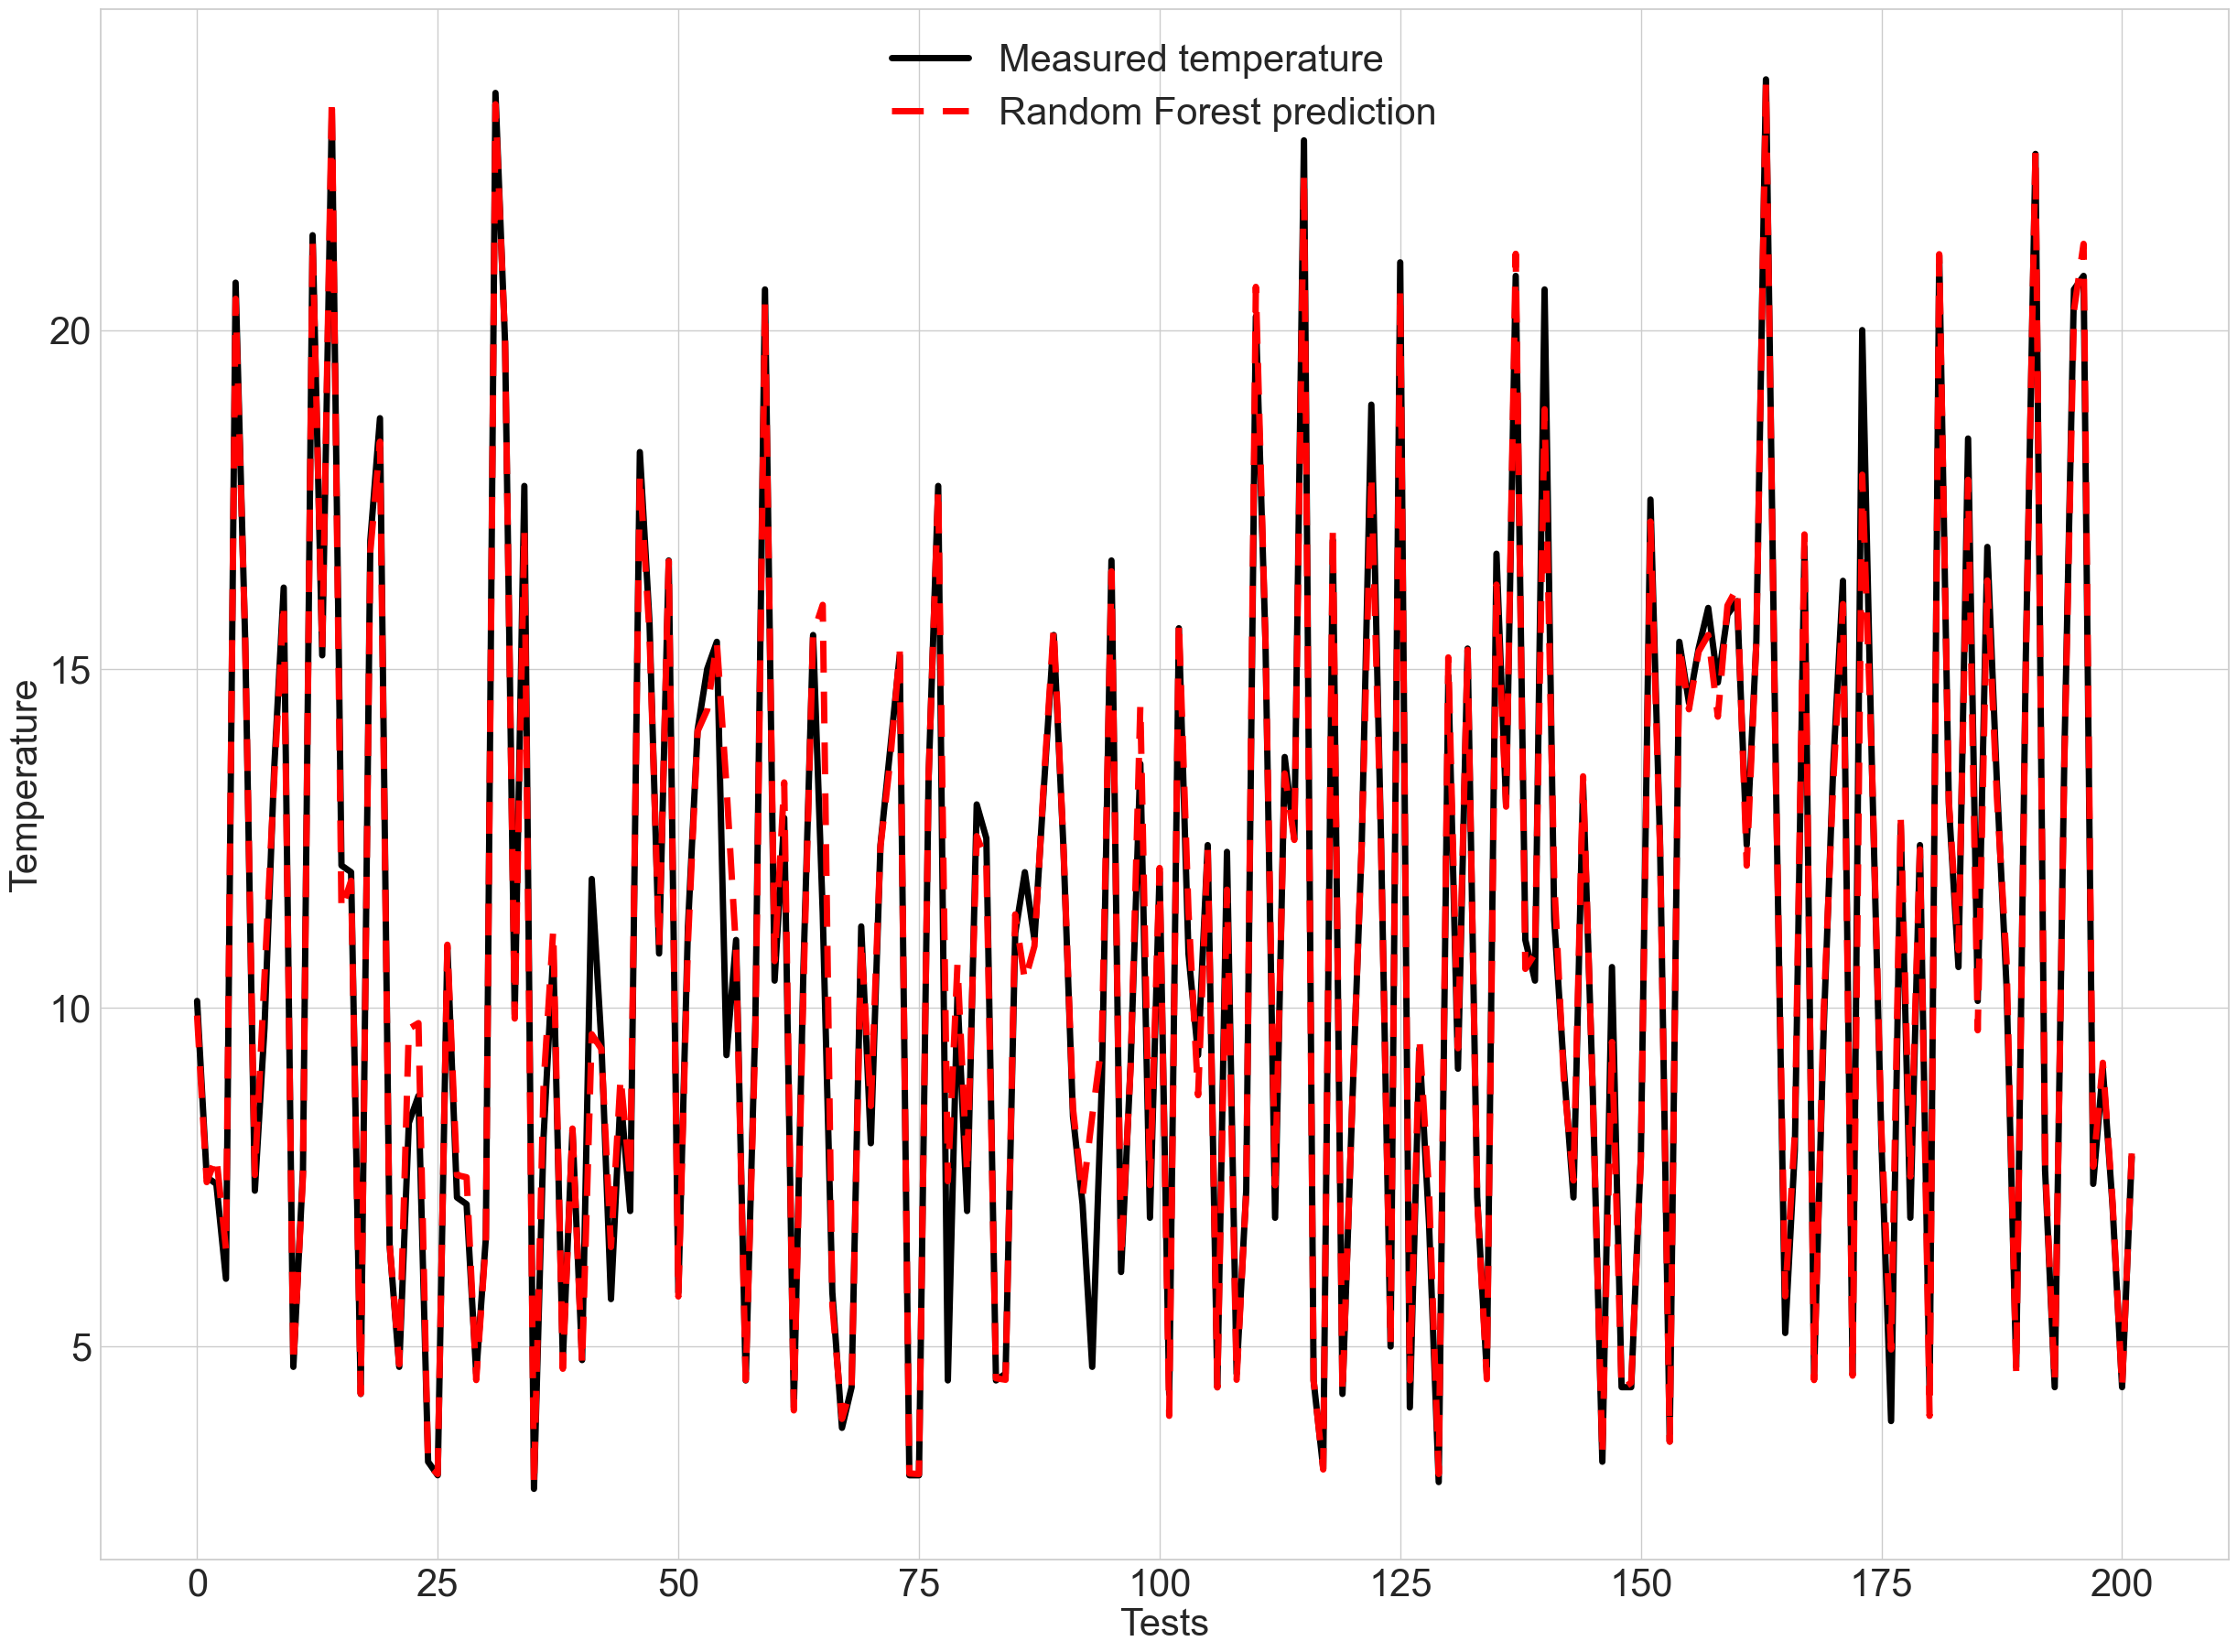

In [9]:
#CELL 9
size = 30
params = {'legend.fontsize': size,
          'figure.figsize': (15, 5),
         'axes.labelsize': size,
         'axes.titlesize':size,
         'xtick.labelsize':size,
         'ytick.labelsize':size}
pylab.rcParams.update(params)

x_ax = range(len(ytest))
plt.plot()
plt.plot(x_ax, ytest, linewidth=5, color = "black", label="Measured temperature")
plt.plot(x_ax, ypred, linewidth=5, color = "red", label="Random Forest prediction", linestyle='dashed', dashes=(5, 3))
#plt.title("Measured and Predicted temperatures")
plt.xlabel('Tests')
plt.ylabel('Temperature')
plt.legend(loc='upper center',fancybox=True, shadow=True)
plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(30, 22)
#fig.savefig('test2png.png', dpi=100)

plt.savefig("temperature.png")
# files.download("temperature.png")

plt.show() 

Feature: 0, Score: 0.01174
Feature: 1, Score: 0.32515
Feature: 2, Score: 0.03278
Feature: 3, Score: 0.09423
Feature: 4, Score: 0.52447
Feature: 5, Score: 0.01164


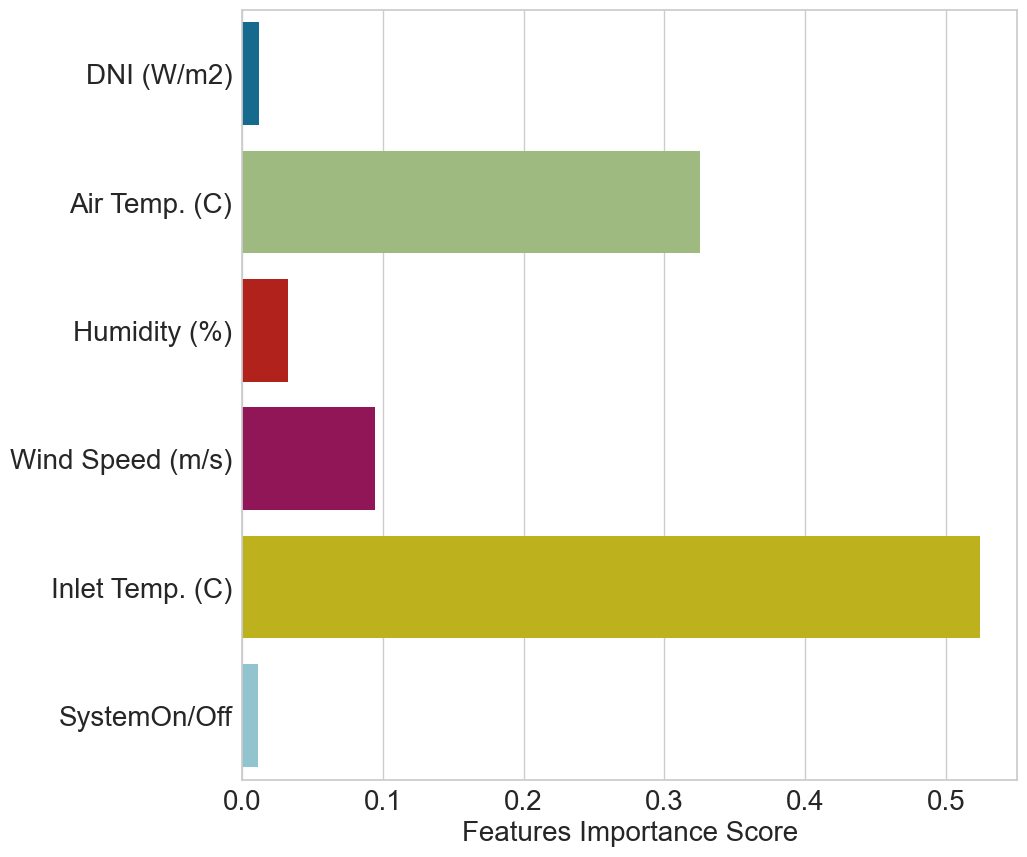

In [10]:
#CELL 10
size = 20
params = {'legend.fontsize': size,
          'figure.figsize': (10, 10),
         'axes.labelsize': size,
         'axes.titlesize':size,
         'xtick.labelsize':size,
         'ytick.labelsize':size}
pylab.rcParams.update(params)

from matplotlib import pyplot
importance = regressor.feature_importances_
import seaborn as sns
features = ['DNI (W/m2)','Air Temp. (C)','Humidity (%)','Wind Speed (m/s)','Inlet Temp. (C)','SystemOn/Off']
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
sns.barplot(y=features, x=importance)
plt.xlabel('Features Importance Score')
#plt.ylabel('Feature')
#plt.title("Visualising Important Features (Heated zone)")

fig = plt.gcf()
#fig.set_size_inches(75, 75)
fig.savefig('featureImportance.png', dpi=10)

plt.savefig("featureImportance.png")
# files.download("featureImportance.png")
pyplot.show()

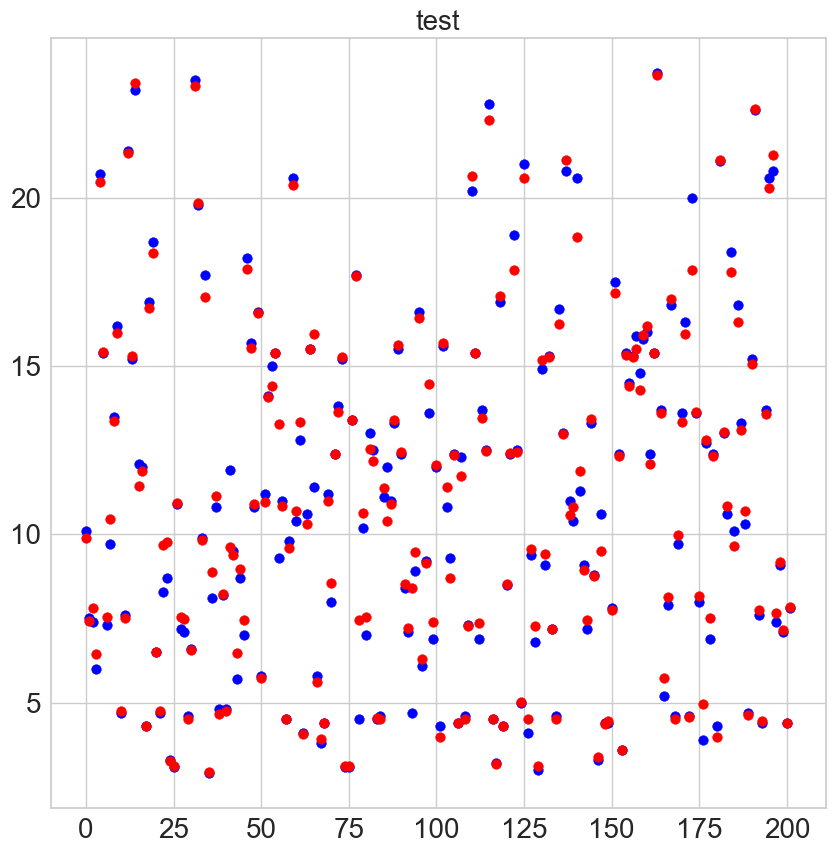

In [11]:
def plotGraph(ytest,ypred,regressorName):
    if max(ytest) >= max(ypred):
        my_rang = int(max(ytest))
    else:
        my_rang = int(max(ypred))
    plt.scatter(range(len(ytest)), ytest, color='blue')
    plt.scatter(range(len(ypred)), ypred, color='red')
    plt.title(regressorName)
    plt.show()
    return

#ytest = range(100)
#ytest = range(int(min(ytest)),int(max(ytest)))
#ypred = np.random.randint(0, 100, 100)

plotGraph(ytest, ypred, "test")

Text(0.5, 1.0, 'Prediction Scaterring')

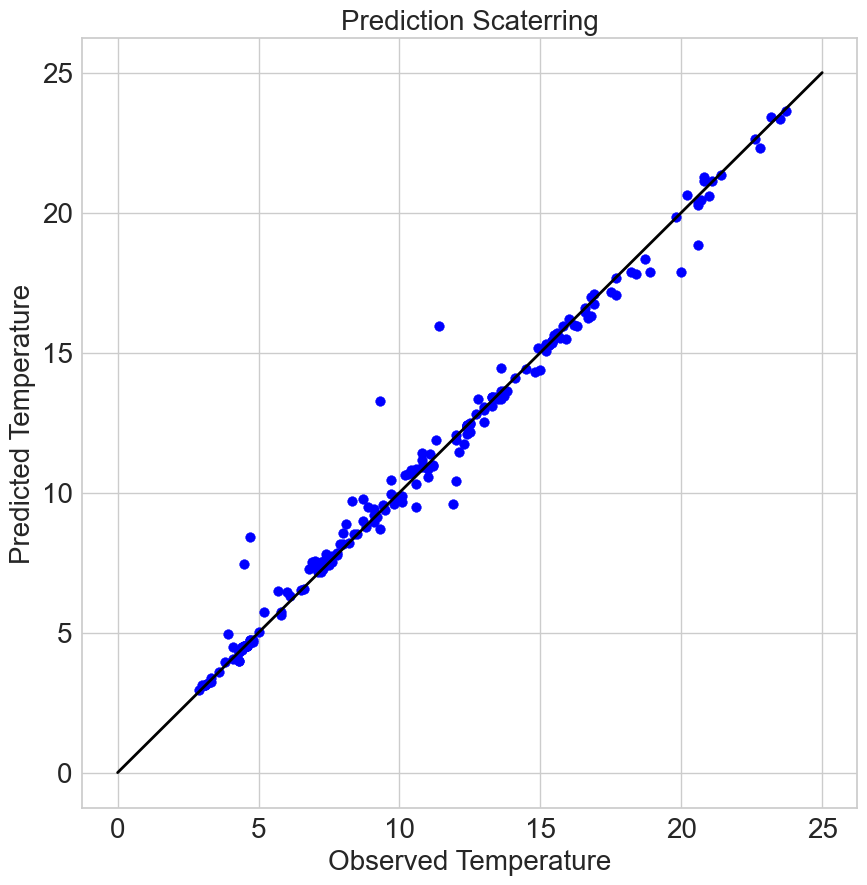

In [12]:
plt.scatter(ytest, ypred, color='blue')
plt.plot([0, 25], [0, 25], color = 'black', linewidth = 2)
plt.xlabel("Observed Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Prediction Scaterring")

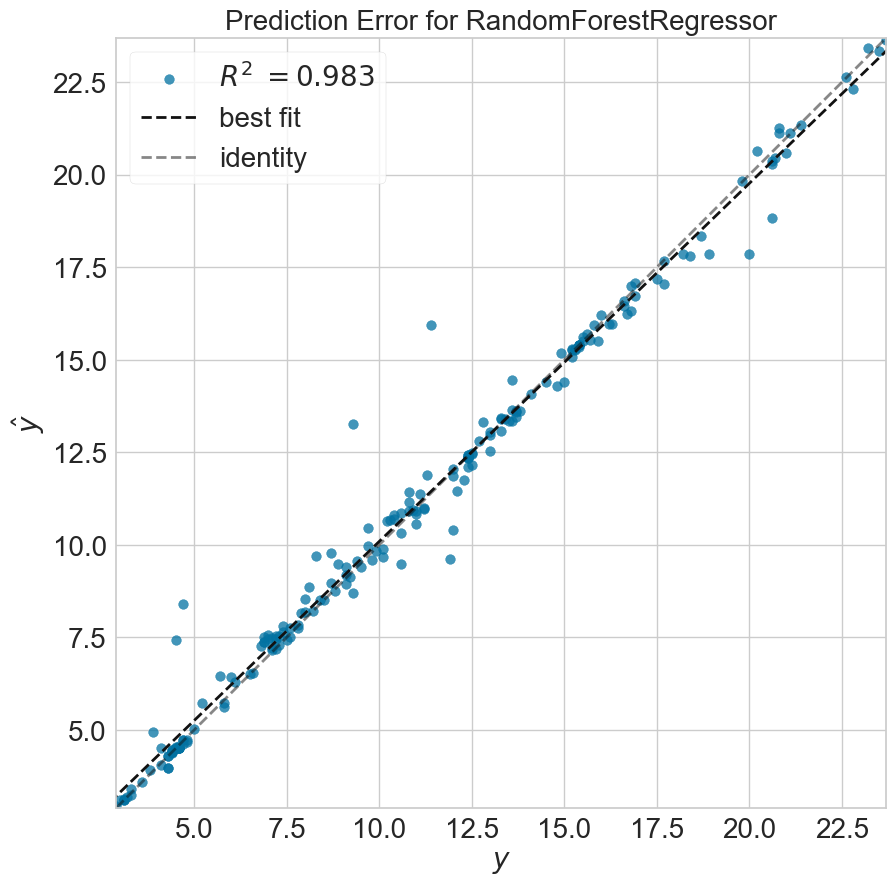

In [13]:
"""
Prediction Error Plot

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model.
This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot
by comparing against the 45 degree line, where the prediction exactly matches the model.

https://www.scikit-yb.org/en/latest/api/regressor/peplot.html 
"""
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(regressor, xtrain, ytrain, xtest, ytest)

size = 19
params = {'legend.fontsize': size,
          'figure.figsize': (12, 12),
         'axes.labelsize': size,
         'axes.titlesize':size,
         'xtick.labelsize':size,
         'ytick.labelsize':size}
pylab.rcParams.update(params)



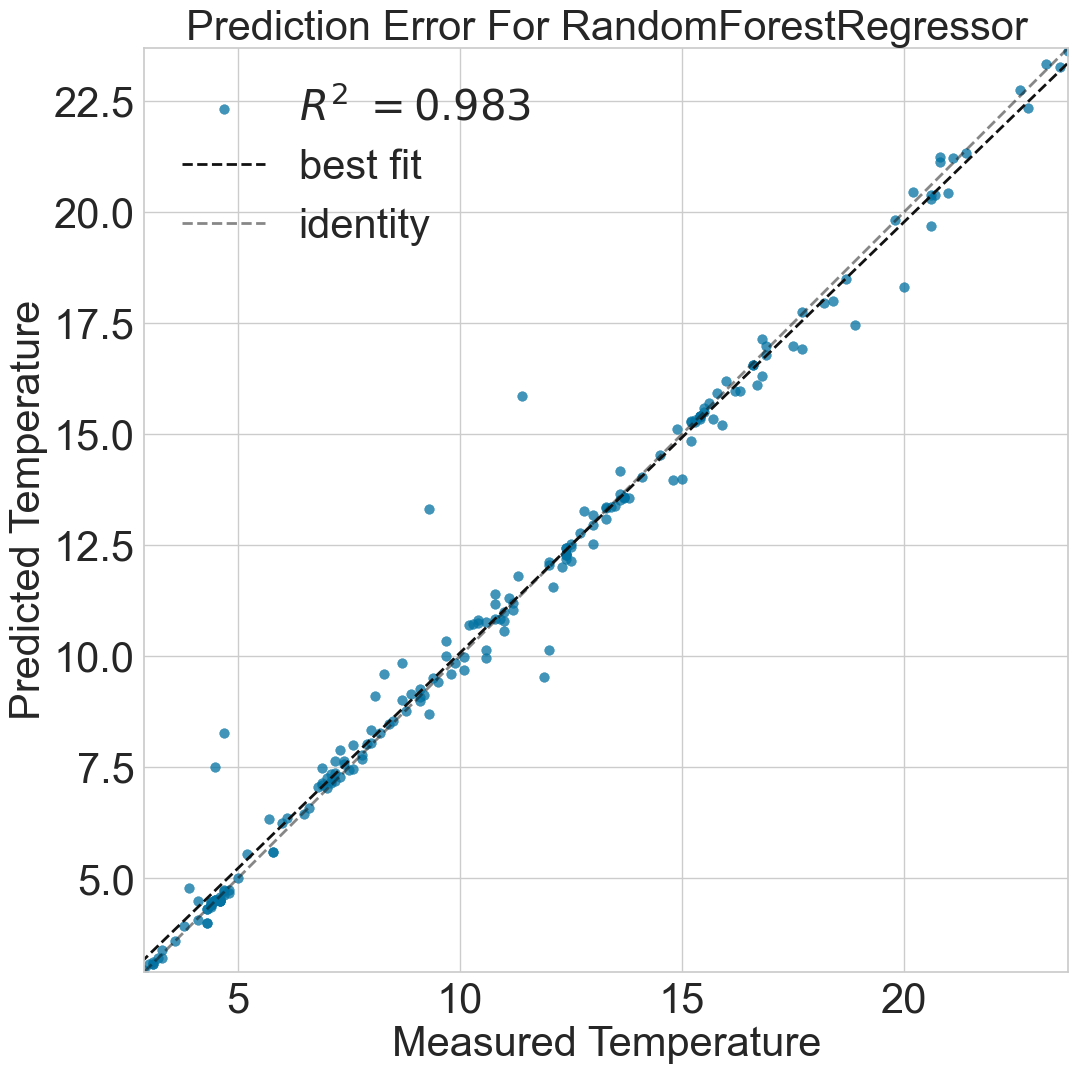

In [14]:
#https://www.scikit-yb.org/en/latest/matplotlib.
#https://www.scikit-yb.org/en/latest/faq.html

from yellowbrick.regressor import PredictionError

#regressor = XGBRegressor()
regressor = RandomForestRegressor()
#regressor = LinearRegression()
#regressor = SVR(kernel = 'linear')
#regressor = KNeighborsRegressor(n_neighbors=3)
# Fit the visualizer
model = PredictionError(regressor)
model.fit(xtrain, ytrain)
model.score(xtest, ytest)



# Call finalize to draw the final yellowbrick-specific elements
model.finalize()

# Get access to the axes object and modify labels
size = 30

model.ax.set_xlabel("Measured Temperature",fontsize=size)
model.ax.set_ylabel("Predicted Temperature",fontsize=size)
model.ax.legend(fontsize=size)
model.ax.tick_params(axis="x", labelsize=size)
model.ax.tick_params(axis="y", labelsize=size)
plt.title('Prediction Error For RandomForestRegressor', fontsize=size)




plt.savefig("RandomForestRegressor.png")
# files.download("RandomForestRegressor.png")

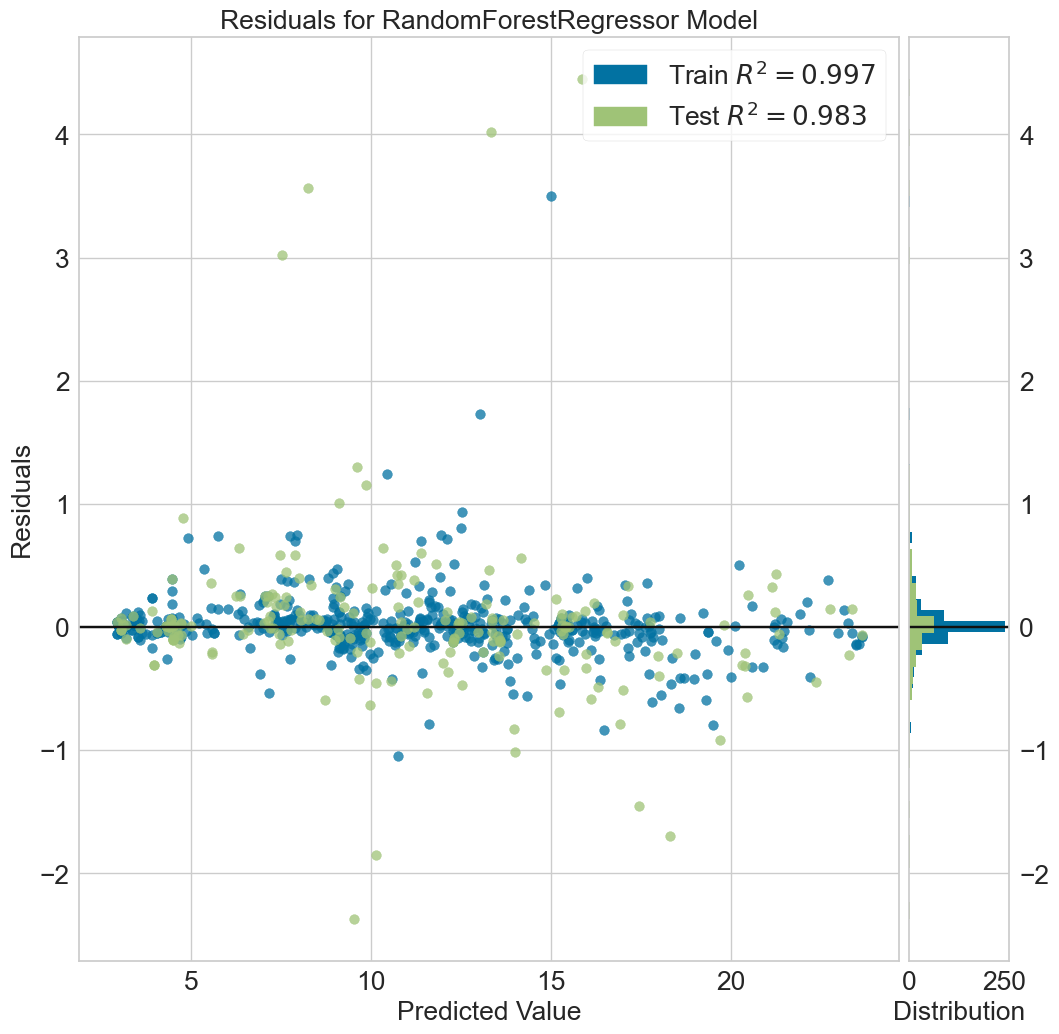

<AxesSubplot: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(regressor)

visualizer.fit(xtrain, ytrain)  # Fit the training data to the visualizer
visualizer.score(xtest, ytest)  # Evaluate the model on the test data
visualizer.show()

In [16]:
import tensorflow as tf

from tensorflow import keras
# from tensorflow.keras import layers

print(tf.__version__)

2.13.0-rc0


In [17]:
# dataset_full = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Temperature_Texas/Temperature_Data.csv")
dataset_full = pd.read_csv('Temperature_Data.csv')

dataset = dataset_full.iloc[:, 2:]
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [18]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
DNI (W/m2),135.032508,280.441016
Air Temp. (C),7.319195,6.764456
Humidity (%),73.450464,19.132987
Wind Speed (m/s),4.617492,2.211938
Inlet Temp. (C),24.825697,15.606468
SystemOn/Off,0.475232,0.499773
Av. Surface temp (heated zone) (C),11.106811,5.052605
Outlet Temp. (C),23.766099,14.296534


In [ ]:
#train_features = train_dataset.copy()
#test_features = test_dataset.copy()

#train_labels = train_features.pop("Av. Surface temp (heated zone) (C)")
#test_labels = test_features.pop("Av. Surface temp (heated zone) (C)")